In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# Load the data
df = pd.read_csv('dataset/recipes_82k.csv')

In [3]:
df.columns

Index(['category', 'cooking_method', 'cuisine', 'image', 'ingredients',
       'prep_time', 'recipe_name', 'serves', 'tags'],
      dtype='object')

In [4]:
df.head()

,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags
0,NaN,['Set the racks in the middle and upper thirds...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['1 tablespoons extra virgin olive oil', '1 cu...",20 minutes,Mediterranean Sea Bass,4 servings,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri..."
1,NaN,['Place the eggs in the air fryer basket and c...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['4 large eggs', 'Salt (black pepper, everythi...",15 minutes,Air Fryer Hard Boiled Eggs,4 eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke..."
2,NaN,"['Air Fryer directions:', 'Preheat air fryer t...",['American'],https://www.skinnytaste.com/wp-content/uploads...,"['olive oil spray', '4 about 5 ounce each salm...",5 minutes,Air Fryer Basil-Parmesan Salmon,4 servings,"Air Fryer Recipes, Gluten Free, Keto Recipes, ..."
3,NaN,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['American'],https://www.skinnytaste.com/wp-content/uploads...,['1/2 cup freshly grated Parmesan (not pre-gra...,15 minutes,Everything Parmesan Crisps,4 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
4,NaN,['Cook potatoes in a large pot of salted water...,['American'],https://www.skinnytaste.com/wp-content/uploads...,['3 1/2 pounds new potatoes (about 10 peeled a...,10 minutes,Potato and Green Bean Salad,12 servings,"Dairy Free, Gluten Free, Kid Friendly, Vegetar..."


In [5]:
# see distribution of nan values
df.isna().sum()

category          64138
cooking_method        0
cuisine              15
image                 0
ingredients           0
prep_time         23615
recipe_name           0
serves                1
tags                234
dtype: int64

In [6]:
# drop rows with tags nan values
df = df.dropna(subset=['tags'])

In [7]:
df.isna().sum()

category          64138
cooking_method        0
cuisine              15
image                 0
ingredients           0
prep_time         23547
recipe_name           0
serves                1
tags                  0
dtype: int64

In [8]:
len(df)

82011

In [9]:
# see cooking_method for the first instance
df['cooking_method'][0]

"['Set the racks in the middle and upper thirds of the oven and preheat the oven to 425 F', 'In a large skillet over medium heat, heat the olive oil until shimmering. Add the onion, garlic and red pepper flakes and cook until golden, stirring occasionally, about 5 minutes.', 'Add the fennel and cook until the vegetables are soft and translucent, an additional 3 to 5 minutes.', 'Reduce the heat to medium and add the tomatoes with their juices. Using the back of a wooden spoon, smash the tomatoes and cook for 5 minutes.', 'Add the basil, wine, olives, 1 teaspoon salt, and 1/8 teaspoon black pepper.', 'Reduce to low and simmer for 15 minutes, or until the sauce is slightly thickened, while you prepare the fish.', 'Pat the fillets dry, lightly spray them with cooking spray, and season with salt and pepper.', 'In a heavy ovenproof skillet over high heat, heat the olive oil until shimmering. Add the fillets, rounded-side down, and cook for 2 minutes.', 'Carefully flip the fillets with a meta

In [10]:
df['ingredients'][0]

"['1 tablespoons extra virgin olive oil', '1 cup chopped yellow onion', '3 cloves garlic (minced)', '1/4 teaspoon crushed red pepper flakes (or to taste)', '1/2 cup chopped fennel', 'One 28 ounce can whole peeled tomatoes (with their juices)', '3/4 cup fresh basil leaves (very thinly sliced)', '1/2 cup dry white wine', '1/4 cup pitted Kalamata olives (halved)', 'Kosher salt', 'Freshly ground pepper', 'Four 4-6 ounce skinless Chilean sea bass fillets (or other sustainable firm white-fleshed fish fillets such as halibut, cod or striped bass)', 'Organic olive oil cooking spray', 'Kosher salt', 'Freshly ground black pepper', '1 tablespoon extra-virgin olive oil']"

In [11]:
df['tags'][0]

'Dairy Free, Gluten Free, Keto Recipes, Kid Friendly, Low Carb, Under 30 Minutes'

In [13]:
l = []
for x in df.tags:
    l.extend(x.split(','))
ls = []
for x in l:
    ls.append(x.strip())

In [16]:
ls_unique = list(set(ls))
ls_unique.sort()

In [17]:
ls_unique

['4th of July',
 'Acorn Squash',
 'African',
 'Air Fryer Recipes',
 'Alfredo',
 'Almond Recipes',
 'American',
 'Anchovy',
 'Andouille Sausage',
 'Angel Food Cake',
 'Antipasti',
 'Appetizer',
 'Apple',
 'Apple Butter',
 'Apple Cake',
 'Apple Cider',
 'Apple Cobbler',
 'Apple Crisp',
 'Apple Dessert',
 'Apple Fritter',
 'Apple Pie',
 'Apple Strudel',
 'Applesauce',
 'Apricot',
 'Argentinean Recipes',
 'Artichoke',
 'Artichoke Appetizer',
 'Artichoke Dip',
 'Arugula',
 'Asian',
 'Asian Appetizer',
 'Asian Noodle',
 'Asian Salad',
 'Asparagus',
 'Austrian Recipes',
 'Avocado',
 'Award Show Recipes',
 'Bacon Recipes',
 'Baked Apple',
 'Baked Beans',
 'Baked Chicken',
 'Baked Fish',
 'Baked Ham',
 'Baked Potato',
 'Baked Salmon',
 'Baked Spaghetti',
 'Baked Tilapia',
 'Baking',
 'Banana',
 'Banana Bread',
 'Banana Cake',
 'Banana Cream Pie',
 'Banana Pudding',
 'Banana Split',
 'Bananas Foster',
 'Barbecue Restaurants',
 'Barbecuing',
 'Barley',
 'Basmati Rice',
 'Bass',
 'Bean Chili',
 'B

We notice that cakes are actually vegetarian but are not classified so

In [30]:
# see first element with Apple Cake in tags
df_apple = df[df['tags'].str.contains('Apple Cake')]
df_apple.iloc[2].tags


'Apple Cake,Apple,Cake,Fruit,Apple Dessert,Fruit Dessert Recipes,Dessert,Baking,Mixer Recipes,Lemon,Sugar,Dairy Recipes,Egg Recipes,Fall,Low Sodium'

In [29]:
df_apple.iloc[2].ingredients

'[\'6 tablespoons (3/4 stick) unsalted butter, at room temperature, plus extra for greasing the dish\', \'1 1/4 Granny Smith apples, peeled and sliced into 12 pieces\', \'1 3/4 cups granulated sugar, divided\', \'2 extra-large eggs, at room temperature\', \'1/3 cup sour cream\', \'1/2 teaspoon grated lemon zest\', \'1/2 teaspoon pure vanilla extract\', \'1 cup plus 2 tablespoons all-purpose flour\', \'1/2 teaspoon baking powder\', \'1/4 teaspoon kosher salt\', "Confectioners\' sugar"]'

In [32]:
# count the recipes that have tag Apple Pie but not Cake
df_pie = df[df['tags'].str.contains('Apple Pie')]
df_pie = df_pie[~df_pie['tags'].str.contains('Cake')]
len(df_pie)

183

In [35]:
df_pie.iloc[0].ingredients

"['4 medium baking apples, peeled, cored and sliced 1/4 inch thick (about 1 3/4 pounds)', '1/2 cup sugar', '1 teaspoon ground cinnamon', '1/2 teaspoon ground nutmeg', '2 tablespoons cornstarch', '1 cup blackberries', '1 cup blueberries', '1 large egg, beaten', 'Your favorite double-crust 9-inch pie dough (2 discs)', '1 egg, lightly beaten']"

In [31]:
# count how may recipes have Cake in the tags
df_cake = df[df['tags'].str.contains('Cake')]
len(df_cake)

2364

In [37]:
df_bananabread = df[df['tags'].str.contains('Banana Bread')]
df_bananabread.iloc[0].tags

'Banana Bread,Banana,Fruit'

In [62]:
df[df['tags'].str.contains('Spinach Dip')].iloc[0].ingredients

"['Kosher salt', '2 10-ounce bags spinach, stems removed', '1 tablespoon unsalted butter', '2 tablespoons minced onion', '1 clove garlic, minced', '2 teaspoons all-purpose flour', '1 1/4 cups whole milk', '1/2 teaspoon fresh lemon juice', '1 teaspoon Worcestershire sauce', '1 1/4 cups grated parmesan cheese', '1/4 cup sour cream, plus more for serving', '1/2 cup shredded white sharp cheddar cheese', '1/2 cup frozen artichoke hearts, thawed, squeezed dry and roughly chopped', 'Tortilla chips and salsa, for serving']"

In [66]:
# define two new classes for df: Vegetarian&Desserts and Others&D
# recipes that contain:
# 'Apple Pie', 'Apple Dessert', 'Apple Cake', 'Banana Bread', 'Banana Cake', 'Banana Cream Pie', 'Blueberry Pancake', 'Brownie', 'Cake', 
# 'Cookie', 'Dessert', 'Dessert Pizza', 'Easy Dessert Recipes', 'Gelato', 'Ice Cream', 'Italian Dessert Recipes', 'Vegan', 'Vegetarian', 'Vegetarian Meals'
#in their tags will be classified as Vegetarian&Desserts, i.e. class Vegetarian&Desserts=1 and Others=0
# all other recipes will be classified as Others&D

vegetarian_desserts = [
    'Apple Pie', 
    'Apple Dessert', 
    'Apple Cake', 
    'Banana Bread', 
    'Banana Cake', 
    'Banana Cream Pie', 
    'Blueberry Pancake', 
    'Brownie', 
    'Cake', 
    'Cookie', 
    'Dessert', 
    'Dessert Pizza', 
    'Easy Dessert Recipes', 
    'Gelato', 
    'Ice Cream', 
    'Italian Dessert Recipes', 
    'Vegan', 
    'Vegetarian', 
    'Vegetarian Meals'
]

# regex to match any of the words in vegetarian_desserts
regex = '|'.join(vegetarian_desserts)

# function to check if a recipe is Vegetarian&Desserts
def is_vegetarian_dessert(tags):
    return bool(re.search(regex, tags))

df['Vegetarian&Desserts'] = df['tags'].apply(is_vegetarian_dessert)

df['Others&D'] = ~df['Vegetarian&Desserts']


In [68]:
# drop useless columns: category, image, prep_time, serves, cuisine
df = df.drop(columns=['category', 'image', 'prep_time', 'serves', 'cuisine'])
df.head()

,cooking_method,ingredients,recipe_name,tags,Vegetarian&Desserts,Others&D
0,['Set the racks in the middle and upper thirds...,"['1 tablespoons extra virgin olive oil', '1 cu...",Mediterranean Sea Bass,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri...",False,True
1,['Place the eggs in the air fryer basket and c...,"['4 large eggs', 'Salt (black pepper, everythi...",Air Fryer Hard Boiled Eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke...",True,False
2,"['Air Fryer directions:', 'Preheat air fryer t...","['olive oil spray', '4 about 5 ounce each salm...",Air Fryer Basil-Parmesan Salmon,"Air Fryer Recipes, Gluten Free, Keto Recipes, ...",False,True
3,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['1/2 cup freshly grated Parmesan (not pre-gra...,Everything Parmesan Crisps,"Gluten Free, Keto Recipes, Kid Friendly, Low C...",True,False
4,['Cook potatoes in a large pot of salted water...,['3 1/2 pounds new potatoes (about 10 peeled a...,Potato and Green Bean Salad,"Dairy Free, Gluten Free, Kid Friendly, Vegetar...",True,False


In [69]:
# Now we do the same but without considering the desserts as vegetarian
# define two new classes for df: Vegetarian and Others
vegetarian = [ 
    'Vegan', 
    'Vegetarian', 
    'Vegetarian Meals'
]

# regex to match any of the words in vegetarian_desserts
regex = '|'.join(vegetarian)

# function to check if a recipe is Vegetarian
def is_vegetarian(tags):
    return bool(re.search(regex, tags))

df['Vegetarian'] = df['tags'].apply(is_vegetarian)

df['Others'] = ~df['Vegetarian']

In [70]:
df.head()

,cooking_method,ingredients,recipe_name,tags,Vegetarian&Desserts,Others&D,Vegetarian,Others
0,['Set the racks in the middle and upper thirds...,"['1 tablespoons extra virgin olive oil', '1 cu...",Mediterranean Sea Bass,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri...",False,True,False,True
1,['Place the eggs in the air fryer basket and c...,"['4 large eggs', 'Salt (black pepper, everythi...",Air Fryer Hard Boiled Eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke...",True,False,True,False
2,"['Air Fryer directions:', 'Preheat air fryer t...","['olive oil spray', '4 about 5 ounce each salm...",Air Fryer Basil-Parmesan Salmon,"Air Fryer Recipes, Gluten Free, Keto Recipes, ...",False,True,False,True
3,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['1/2 cup freshly grated Parmesan (not pre-gra...,Everything Parmesan Crisps,"Gluten Free, Keto Recipes, Kid Friendly, Low C...",True,False,True,False
4,['Cook potatoes in a large pot of salted water...,['3 1/2 pounds new potatoes (about 10 peeled a...,Potato and Green Bean Salad,"Dairy Free, Gluten Free, Kid Friendly, Vegetar...",True,False,True,False


In [71]:
# see the distribution of the classes
df['Vegetarian'].value_counts()

Vegetarian
False    69432
True     12579
Name: count, dtype: int64

In [73]:
df['Vegetarian&Desserts'].value_counts()

Vegetarian&Desserts
False    54780
True     27231
Name: count, dtype: int64

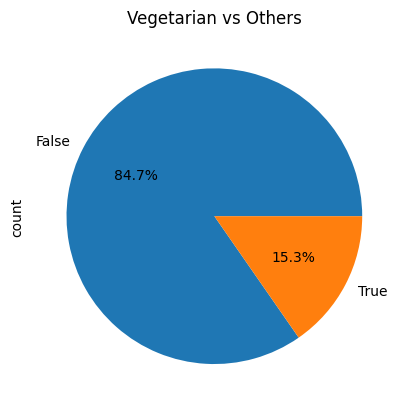

In [77]:
# see the distribution of Vegetarian and Others in a pie chart with plt
fig, ax = plt.subplots()
df['Vegetarian'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
ax.set_title('Vegetarian vs Others')
plt.show()

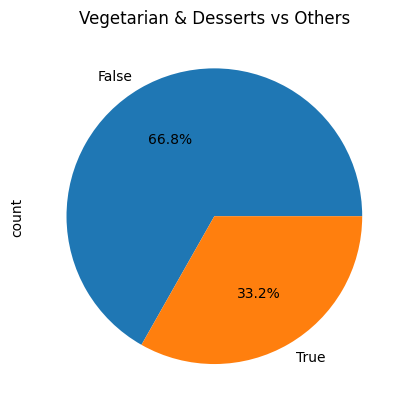

In [78]:
# see the distribution of Vegetarian&Desserts and Others&D in a pie chart with plt
fig, ax = plt.subplots()
df['Vegetarian&Desserts'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
ax.set_title('Vegetarian & Desserts vs Others')
plt.show()